# 机器学习纳米学位毕业项目 -- 猫狗大战
---

何伟华
2019.07.29


## 项目概述
---

Cats vs. Dogs来源于Kaggle大数据竞赛的一道赛题（娱乐型竞赛项目）：https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition, 利用给定的数据集，用算法实现猫和狗的识别。

本项目数据集是Kaggle竞赛提供的数据，训练集包括 12500 张被标记为猫的图片和12500张被标记为狗的图片，测试集包括12500张未标记图片。对于每一张测试集中的图像，模型需要预测出是狗图像的概率(1 代表狗，0 代表猫)。 
    
- 输入：一张彩色图片
- 输出：是猫还是狗的概率


## 项目背景
---
kaggle一共举行过两次猫狗大战的比赛，第一次是在2013年，那个时候使用的是正确率作为评估标准，而在2017年第二次举办猫狗大战的比赛时，使用的是log损失函数。这么做是因为现在深度学习的发展到一定阶段有更好的方法，而深度学习尤其适合处理图像方面的问题，如果依旧是使用正确率作为评估标准，那么大多数选手的模型都是99%的正确率，不能明显地区分开。如果使用log损失函数，不仅仅需要分类正确，还需要对结果有一个较高的可信度，这样就能明显地区分各个模型的分类效果，尤其是Top模型的分类效果。


## 实验环境
---

本项目使用Anaconda搭建环境。mac os、jupyter notebook、python3、keras，模型训练使用云服务。



## 设计方案
---

本项目使用融合模型实现，整个迁移学习的神经网格结构如下所示。

<img src="source/model.png">

## 评价指标
---
对数损失（Log loss）亦被称为逻辑回归损失（Logistic regression loss）或交叉熵损失（Cross-entropy loss）。 交叉熵是常用的评价方式之一，它实际上刻画的是两个概率分布之间的距离，是分类问题中使用广泛的一种损失函数。
本文实际上是二分类问题， 因此可以采用 logloss 损失函数作为评价指标， 计算公式如下：
$$\textrm{LogLoss} = - \frac{1}{n} \sum_{i=1}^n \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right]$$
其中：

- n 是测试集中图片数量
- $\hat{y}_i$ 是图片预测为狗的概率
- $y_i$ 如果图像是狗为1，如果是猫为0
- log() 是自然（基数 e）对数

采用交叉熵作为损失函数可以有效的解决梯度消失和梯度爆炸的问题。
交叉熵损失越小，代表模型的性能越好。上述评估指标可用于评估该项目的解决方案以及基准模型。

## 数据探索及预处理

下载 kaggle 猫狗数据集解压后分为 3 个文件 train.zip、 test.zip 和 sample_submission.csv。
数据集由训练数据和测试数据组成，训练数据包含猫和狗各12500张图片，测试数据包含12500张猫和狗的图片。命名规则根据 “type.num.jpg” 方式命名。
test 测试集包含了 12500 张猫狗的图片，没有标定是猫还是狗，每张图片命名规则根据 “num.jpg”，需要注意的是测试集编号从 1 开始，而训练集的编号从 0 开始。
sample_submission.csv 需要将最终测试集的测试结果写入submission.csv 文件中，上传至 kaggle 进行打分。
具体步骤：
 从[Dogs vs. Cats Redux: Kernels Edition](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data) 下载训练数据到`image目录` 并解压到当前目录。
从训练集中提取图片可视化显示。

In [2]:
import os
os.chdir("{}/image".format(os.getcwd()))

In [2]:
%ls train | head

cat.0.jpg
cat.10000.jpg
cat.10001.jpg
cat.10002.jpg
cat.10003.jpg
cat.10004.jpg
cat.10005.jpg
cat.10006.jpg
cat.10007.jpg
cat.10008.jpg
ls: write error


In [3]:
%ls test | head

10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg
10005.jpg
10006.jpg
10007.jpg
10008.jpg
10009.jpg
ls: write error


Using TensorFlow backend.


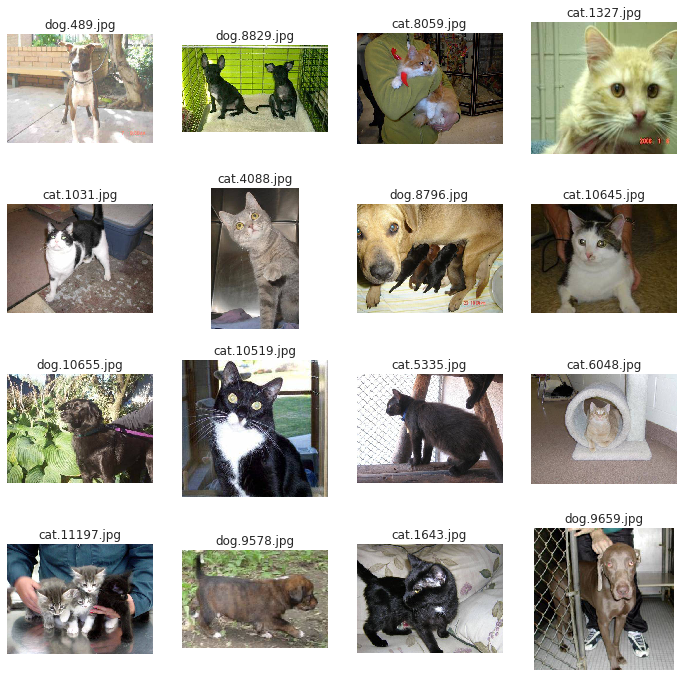

In [4]:
from keras.preprocessing.image import load_img
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

plt.style.use('seaborn-white')

namelist = os.listdir('train/')
plt.figure(figsize=(12, 12))
for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    j = random.randint(0, 25000)
    img = load_img('train/'+ namelist[j])
    plt.title(namelist[j])
    plt.axis('off')
    plt.imshow(img, interpolation='nearest')

绘制训练集中图片的尺寸散点分布图。

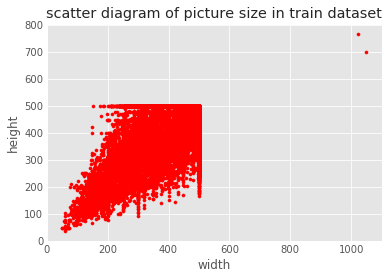

In [5]:
from keras.preprocessing.image import img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

targetnames = os.listdir('train/')
heights = []
widths = []
for name in targetnames[1:]:
    img = load_img('train/' + name)
    x = img_to_array(img)
    heights.append(x.shape[0])
    widths.append(x.shape[1])

x = np.array(widths)
y = np.array(heights)
area = np.pi * (35 * 0.05)**2  # dot's size

plt.scatter(x, y, s=area, c='red', alpha=1, marker = 'o')
plt.title('scatter diagram of picture size in train dataset')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

绘制测试集中图片的尺寸散点分布图

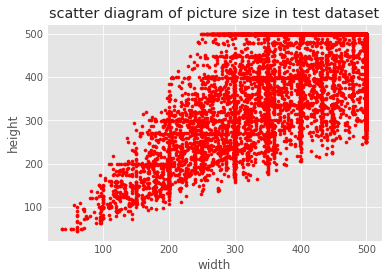

In [8]:
from keras.preprocessing.image import img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

targetnames = os.listdir('test/')
heights = []
widths = []
for name in targetnames[1:]:
    if(name.endswith('.jpg')):
        img = load_img('test/'+name)
        x = img_to_array(img)
        heights.append(x.shape[0])
        widths.append(x.shape[1])

x = np.array(widths)
y = np.array(heights)
area = np.pi * (35 * 0.05)**2  # dot's size

plt.scatter(x, y, s=area, c='r', alpha=1, marker = 'o')
plt.title('scatter diagram of picture size in test dataset')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

异常图片的检测和移除，见另外一个文件：detection_remove.ipynb

经过观察数据，数据集中大部分图片是正常的，下面这小部分异常图片，对于训练集来说这些异常数据是要剔除掉的。

数据集中的文件名是以type.num.jpg方式命名的，比如cat.0.jpg。使用 Keras 的 ImageDataGenerator 需要将不同种类的图片分在不同的文件夹中。对数据集进行预处理参考的是[杨培文的Blog](http://www.zhiding.cn/techwalker/documents/J9UpWRDfVYHE5WsOEHbyx4eM8fBcpHYEW_b72QCUihQ)创建符号链接(symbol link)的方法，这样的好处是不用复制一遍图片，占用不必要的空间。

图像文件分类后的路径如下：

``` python
image
├── test 
├── img_test
│   ├── test 
├── train 
├── img_train
│   ├── cat 
│   └── dog 
``` 

可视化数据集：

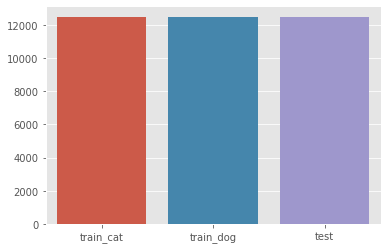

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')

x = ['train_cat', 'train_dog', 'test']
y = [len(os.listdir('img_train/cat')), len(os.listdir('img_train/dog')), len(os.listdir('img_test/test'))]
ax = sns.barplot(x=x, y=y)

In [4]:
s_count = """image数据集中，猫的数量：{}，狗的数量：{}，测试集图片数量：{}""".format(len(os.listdir('img_train/cat')), len(os.listdir('img_train/dog')),len(os.listdir('img_test/test')))
s_count

'image数据集中，猫的数量：12479，狗的数量：12476，测试集图片数量：12500'

## 问题分析及模型选择
---

<img src="source/cat_dog_classify.gif"/>

上图给出了一个简单的猫狗识别的卷积神经网络结构，在最底下（同时也是最大的）的点块表示的是网络的输入层（Input Layer），通常这一层作用是读入图像作为网络的数据输入。在最上面的点块是网络的输出层（Output Layer），其作用是预测并输出读入图像的类别，在这里由于只需要区分猫和狗，因此输出层只有2个神经计算单元。而位于输入和输出层的，都称之为隐含层（Hidden Layer），图中有3个隐含层，图像分类的隐含层都是由卷积操作完成的，因此这样的隐含层也成为卷积层（Convolutional Layer）。因此，输入层、卷积层、输出层的结构及其对应的参数就构成了一个典型的卷积神经网络。当然，在实际中使用的卷积神经网络要比这个示例的结构更加复杂，自2012年的ImageNet比赛起，几乎每一年都会有新的网络结构诞生，已经被大家认可的常见网络有AlexNet, VGG-Net, GoogLeNet, Inception V2-V4, ResNet等等。这些卷积神经网络都是在ImageNet数据集上表现非常优异的神经网络，具体准确率和模型大小如下图所示。

<img src="source/nnarch1-1.png"/>

<img src="source/imagenet_info.png">

卷积神经网络中卷积层和池化层主要是对图片的几何特征进行抽取，比如浅层的卷积池化层可以抽取出一些直线，角点等简单的抽象信息，深层的卷积池化层可以抽取人脸等复杂的抽象信息，最后的全连接层才是对图片分类的关键处理。因此可以利用已经训练好的卷积神经网络提取图片中复杂的几何特征，即将原始图片用已经训练好的卷积神经网络处理之后的输出，作为新的输入，然后加上自己的全连接层，去进行分类。在模型训练的过程中，只改变新加的全连接层的权重。

由于每一种神经网络提取的特征都不一样，因此本项目将多个神经网络处理的结果拼接，作为最后一层全连接层的输入，这样做可以有效地降低方差。

本项目迁移学习部分使用Keras实现，而Keras中可以导入的模型有Xception，VGG16，VGG19，ResNet50，InceptionV3，InceptionResNetV2，MobileNet. 综合考虑模型的分类准确率和大小，选用迁移学习的基础模型为ResNet50，InceptionV3，Xception，InceptionResNetV2。

---
## 生成迁移学习特征向量
在keras文档中的预处理函数，根据在imagenet数据集上的预测准确率，排名比较好的的是InceptionResNetV2、Xception、InceptionV3，ResNet50考虑用这四个模型进行融合。这四个模型对于输入数据都有各自的默认值，比如在输入图片大小维度上，Xception、InceptionV3、InceptionResNetV2默认输入图片大小是299x299，ResNet50默认输入图片大小是224x224；在输入数值维度上，Xception、InceptionV3、InceptionResNetV2默认输入数值在(-1, 1)范围内。当要输入与默认图片大小不同的图片时，只需传入当前图片大小即可。ResNet50需要对图片进行中心化处理，由于载入的ResNet50模型是在ImageNet数据上训练出来的，所以在预处理中每个像素点都要减去ImageNet均值。当要输入与默认图片大小不同的图片时，只需传入当前图片大小即可。当输入数值不符合默认要求时，使用每个模型的预处理函数`preprocess_input`即可将输入图片处理成该模型的标准输入。

常见的卷积神经网络结构在前面的若干层都是卷积池化层及其各种变种，后面几层都是全连接层，这些全连接层之前的网络层被称为瓶颈层 (bottleneck). 将新的图片通过训练好的卷积神经网络直到瓶颈层的过程可以看做是对图像进行特征提取的过程。一般情况下，为了减少内存的消耗， 加快计算的过程，再将瓶颈层的结果输入全连接层之前，做一次全局平均池化，比如ResNet50瓶颈层输出结果是7x7x2048，如果直接输入到全连接层，参数会非常多，所以进行一次全局平均池化，将输出矩阵调整为 1x1x2048，这么做还有一个好处，那就是可以降低过拟合的程度。

在Keras中载入模型并进行全局平均池化，只需要在载入模型的时候，设置include_top=False, pooling='avg'. 每个模型都将图片处理成一个 1x2048的行向量，将这四个行向量进行拼接，得到一个1x8192的行向量， 作为数据预处理的结果。

In [15]:
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.applications.inception_resnet_v2 import InceptionResNetV2,preprocess_input
from keras.preprocessing.image import *
import h5py

train_sample_counts = len(os.listdir('img_train'))
test_sample_counts = len(os.listdir('img_test'))

def preprocess_input(x):
    return x - [103.939, 116.779, 123.68]

def write_gap(MODEL, image_size, func=None):
    width = image_size[0]
    height = image_size[1]
    inputs = Input((height, width, 3))
    x = inputs
    if func:
        if(MODEL.__name__ == 'ResNet50'):
            x = Lambda(preprocess_input, name='preprocessing')(x)
        else:
             x = Lambda(func)(x)#增加预处理函数层
    
    base_model = MODEL(input_tensor=x, weights='imagenet', include_top=False)
    model = Model(base_model.input, GlobalAveragePooling2D()(base_model.output))
    
    gen = ImageDataGenerator()
    train_generator = gen.flow_from_directory("img_train", image_size, shuffle=False, batch_size=16)
    test_generator = gen.flow_from_directory("img_test", image_size, shuffle=False, batch_size=16, class_mode=None)
    #train = model.predict_generator(train_generator, train_generator.nb_sample) 
    #test = model.predict_generator(test_generator, test_generator.nb_sample)
    train = model.predict_generator(train_generator, train_sample_counts) 
    test = model.predict_generator(test_generator, test_sample_counts)
    

    with h5py.File("gap_%s.h5"%MODEL.__name__) as h:
        h.create_dataset("train", data=train)
        h.create_dataset("test", data=test)
        h.create_dataset("label", data=train_generator.classes)

In [16]:
write_gap(ResNet50, (224, 224), preprocess_input)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Found 24893 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [17]:
write_gap(InceptionV3, (299, 299), inception_v3.preprocess_input)

Found 24893 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [18]:
write_gap(Xception, (299, 299), xception.preprocess_input)

Found 24893 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [19]:
write_gap(InceptionResNetV2, (299, 299), inception_resnet_v2.preprocess_input)

Found 24893 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


## 载入特征向量
---

经过上面的代码以后，我们获得了三个特征向量文件，分别是：

- gap_ResNet50.h5
- gap_InceptionV3.h5
- gap_Xception.h5
- gap_InceptionResNetV2.h5

这里需要载入这些特征向量，并且将它们合成一条特征向量，然后记得把 X 和 y 打乱，不然之后设置validation_split的时候会出问题。这里设置了 numpy 的随机数种子为2019。

In [40]:
import h5py
import numpy as np
from sklearn.utils import shuffle
np.random.seed(2019)

X_train = []
X_test = []

for filename in ["gap_ResNet50.h5", "gap_Xception.h5", "gap_InceptionV3.h5", "gap_InceptionResNetV2.h5"]:
    with h5py.File(filename, 'r') as h:
        X_train.append(np.array(h['train']))
        X_test.append(np.array(h['test']))
        y_train = np.array(h['label'])

X_train = np.concatenate(X_train, axis=1)
X_test = np.concatenate(X_test, axis=1)
X_train, y_train = shuffle(X_train, y_train)

## 构建模型
---

载入预处理的数据之后，先进行一次概率为0.5的dropout, 减少参数减少计算量，防止过拟合，然后直接连接输出层，激活函数为Sigmoid，优化器为Adadelta，输出一个零维张量，表示某张图片中有狗的概率。

In [41]:
from keras.models import *
from keras.layers import *
from keras.regularizers import *

input_tensor = Input(X_train.shape[1:])
x = input_tensor
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(input_tensor, x)

model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])

整个迁移学习的神经网格结构如下所示。

<img src="source/model.png">

## 训练模型
---

模型构件好了以后，我们就可以进行训练了，这里我们设置验证集大小为 20% 。

其中批处理参数batch_size，太小时可能会使学习过于随机，虽然训练速率很快，但收敛震动且得到一个不可靠模型。在合理的范围内，增大batch_size可以提高内存利用率，大矩阵乘法的并行化效率提高；跑完一次epoch（全数据集）所需的迭代次数减少，对于相同数据量的处理速度进一步加快；在适当范围内，batch_size越大，其确定的下降方向越准，引起训练波动越小，这里batch_size=128是一个比较合适的经验值（在云平台上训练）。

In [43]:
from keras.callbacks import *
# model_history = model.fit(X_train, y_train, batch_size=128, nb_epoch=8, verbose=1, validation_split=0.2, callbacks = [TensorBoard(log_dir='./Graph')])

from keras.callbacks import ModelCheckpoint  
checkpointer = ModelCheckpoint(filepath='weights.best.cat_vs_dog.hdf5', verbose=1, save_best_only=True)
model_history = model.fit(X_train, y_train, epochs=8, batch_size=128, validation_split=0.2, callbacks=[checkpointer], verbose=1)

Train on 19914 samples, validate on 4979 samples
Epoch 1/8
19914/19914 [==============================] - 8s 384us/step - loss: 0.1044 - acc: 0.9701 - val_loss: 0.0244 - val_acc: 0.9952
Epoch 2/8
19914/19914 [==============================] - 1s 48us/step - loss: 0.0209 - acc: 0.9949 - val_loss: 0.0157 - val_acc: 0.9952
Epoch 3/8
19914/19914 [==============================] - 1s 47us/step - loss: 0.0145 - acc: 0.9961 - val_loss: 0.0146 - val_acc: 0.9958
Epoch 4/8
19914/19914 [==============================] - 1s 48us/step - loss: 0.0127 - acc: 0.9961 - val_loss: 0.0146 - val_acc: 0.9954
Epoch 5/8
19914/19914 [==============================] - 1s 48us/step - loss: 0.0110 - acc: 0.9968 - val_loss: 0.0140 - val_acc: 0.9958
Epoch 6/8
19914/19914 [==============================] - 1s 47us/step - loss: 0.0107 - acc: 0.9969 - val_loss: 0.0146 - val_acc: 0.9958
Epoch 7/8
19914/19914 [==============================] - 1s 46us/step - loss: 0.0097 - acc: 0.9972 - val_loss: 0.0159 - val_acc: 0.995

训练过中的loss和accuracy如下：

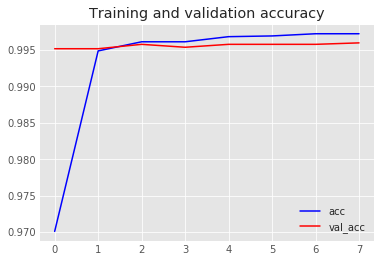

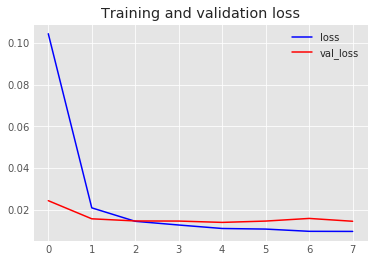

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
# 画图
def plot_training(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.legend(["acc", "val_acc"], loc='best')
    plt.title('Training and validation accuracy')
    plt.figure()

    loss = history.history['loss']
    val_loss = history.history['val_loss']   
    plt.plot(epochs, loss, 'b')
    plt.plot(epochs, val_loss, 'r')
    plt.legend(["loss", "val_loss"], loc='best')
    plt.title('Training and validation loss')
    plt.show()

# 训练的acc_loss图
plot_training(model_history)

可以看到，训练的过程很快，十秒以内就能训练完，准确率也很高，在验证集上最高达到了99.60%的准确率，这相当于一千张图只错了4张, 非常不错的成绩了。

## 预测测试集
---

使用训练好的模型中对处理过的测试集数据进行分类，得到每张图片中有狗的概率。在提交的kaggle之前，先使用`numpy.clip()`函数做一个截断处理，将所有图片的概率值限制在$[0.005, 0.995]$之间，这样可以稍微降低loss。

kaggle 官方的评估标准是 LogLoss，下面的表达式就是二分类问题的 LogLoss 定义。

$$\textrm{LogLoss} = - \frac{1}{n} \sum_{i=1}^n \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right]$$

$|log(1)|=0.000$

$|log(0.995)|=0.0050$

$lim_{x\to 0}|log(x)|=\infty$

$|log(0.005)|=5.2983$

不过由于kaggle本身就做了一次截断，限制了最小值为$1e-15$，又$|log(1e−15)|=34.5388$。 所以如果把预测正确的概率从1截断到$0.995$，单张图片的loss最多增加$0.0050$，但是如果把预测错误的概率从$1e-15$截断到$0.005$，那么会极大地降低loss。

测试集图片id的顺序为：

In [46]:
%ls test | head -n 10

10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg
10005.jpg
10006.jpg
10007.jpg
10008.jpg
10009.jpg
ls: write error


由于kaggle是根据id来确定每张图片的类别的，因此我们需要对每个文件名进行处理，然后赋值到 df 里，最后导出为 csv 文件。

In [47]:
import pandas as pd
from keras.preprocessing.image import *

df = pd.read_csv("sample_submission.csv")

image_size = (224, 224)
gen = ImageDataGenerator()
test_generator = gen.flow_from_directory("img_test", image_size, shuffle=False, 
                                         batch_size=16, class_mode=None)

y_pred = model.predict(X_test, verbose=1)
y_pred = y_pred.clip(min=0.005, max=0.995)

for i, fname in enumerate(test_generator.filenames):
    index = int(fname[fname.rfind('/')+1:fname.rfind('.')])
    df.set_value(index-1, 'label', y_pred[i])

df.to_csv('submission.csv', index=None)
df.head(10)

Found 12500 images belonging to 1 classes.
12500/12500 [==============================] - 3s 206us/step


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


,id,label
0,1,0.995
1,2,0.995
2,3,0.995
3,4,0.995
4,5,0.005
5,6,0.005
6,7,0.005
7,8,0.005
8,9,0.005
9,10,0.005


将测试集的处理结果提交到kaggle上，loss为0.03556，和验证集的loss近似。

<img src="source/cat_vs_dog_kaggle_score.png">

## 结果分析
---

单个ResNet50模型8次迭代训练结果（训练结果见cat_vs_dog_cam.ipynb）：

- 训练集loss：0.0356 - acc: 0.9878；验证集val_loss：0.0263 - val_acc: 0.9910。

使用ResNet50，Xception，InceptionV3，InceptionResNetV2这四个模型进行迁移学习8次迭代训练结果：

- 训练集loss：0.0096 - acc: 0.9972； 验证集val_loss：0.0170 - val_acc: 0.9960。

ResNet50有168层，Xception有126层，InceptionV3有159层，InceptionResNetV2有572层，不同的卷积核有各种各样的的组合，可更好抽取图片中的泛化特征；这样既提高分类的准确率，又降低模型的过拟合风险，一般情况下网络越深，准确率越高。

ResNet50，Xception，InceptionV3，InceptionResNetV2这四个模型进行组合迁移学习，效果比先单个神经网络模型效果好。这里利用了bagging的思想，通过多个模型处理数据并进行组合，可以有效降低模型的方差，减少过拟合程度，提高分类准确率。

## 总结感想
---
本项目使用迁移学习和融合模型完成，站在巨人的肩膀上可以轻松的学习到很优秀的权重参数。这过程中在自己MAC上折腾好几周，但是只能跑一个模型，机器发热严重风扇呼呼的一直转，感觉电脑都要冒烟了，好几次导致电脑自动关机了。然后，跑任务的时候把电脑所有的程序都关掉，跑了足足8多小时，终于能全部跑通。但是，使用多模型融合时就不行了，电脑直接提示内存警告，直接宕机，在网上找了AWS、腾讯的GPU，都不好用，腾讯的还收费那么贵。终于，通过一个同事知道公司内部有免费服务器资源，通过申请公司的GUP服务器才把项目完成。做这个项目，最大的困难就是使用云计算平台去训练，熟练了整个云计算平台的基本使用流程。

该项目中使用了Xception，InceptionV3 和 ResNet50 ，gap_InceptionResNetV2这四个模型进行了提取特征向量，然后将特征向量直接拼接，忽略了特征之间的位置关系。除了这四个模型，还可以增加更多新的模型，或者使用stacking的方法进行模型融合，进一步降低方差，提高分类的准确率。或者使用更强大的分类器进行训练；这过程中尝试过使用EfficientNets，预训练好的模型EfficientNet提供B0到B5， B5的精确度83.2%，B6,B7还没提供，由于时间关系没继续走这条路。

最开始做这个项目，先用TensorFlow来实现，发现有很多坑，mac尝试了很多次没能跑起来，所以放弃了。Keras对于初学者还是很友好，使用简单而且稳定，虽然Keras底层实现也是TensorFlow框架，但是Keras对TensorFlow封装的更好，更友好。除非Keras没提供的一些TensorFlow的方法，这时我们可使用TensorFlow底层方法。


## 参考文献
---

    [1] Karen Simonyan and Andrew Zisserman. VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE- SCALE IMAGE RECOGNITION. At ICLR,2015. 
    [2] [译] Deep Residual Learning for Image Recognition (ResNet)
    [3] 手把手教你如何在Kaggle猫狗大战冲到Top2%：https://yangpeiwen.com/dogs-vs-cats-2
    [4] Keras做图片分类（四）：迁移学习--猫狗大战实战：https://zhuanlan.zhihu.com/p/51889181
    [5] Kaggle猫狗大战准确率Top 2%webapp部署：https://www.jianshu.com/p/1bc2abe88388
    [6] Keras中文文档：https://keras.io/zh/applications
    [7] 毕业设计 Dogs vs Cats For Udacity P7 (异常值检验)：https://zhuanlan.zhihu.com/p/34068451
    [8] 面向小数据集构建图像分类模型：https://keras-cn-docs.readthedocs.io/zh_CN/latest/blog/image_classification_using_very_little_data
    [9] 杨培文 胡博强．深度学习技术图像处理入门. 北京：清华大学出版社，2018（2019.4 重印）.
    [10] [美]Ian GoodFellow [加]Yoshua Bengio [加]Aaron Courvile 著 赵申剑等人译. 深度学习. 北京：人民邮电出版社，2017.8（2017.12 重印）.
    [11] efficientnet: https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet